In [18]:
# import libraries and packages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from pprint import pprint

In [2]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/nikitaa30/Content-based-Recommender-System/master/sample-data.csv")

* explore DataFrame

In [3]:
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [4]:
df.shape

(500, 2)

In [5]:
df.isnull().sum()

id             0
description    0
dtype: int64

In [6]:
df['description'].value_counts()

Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>

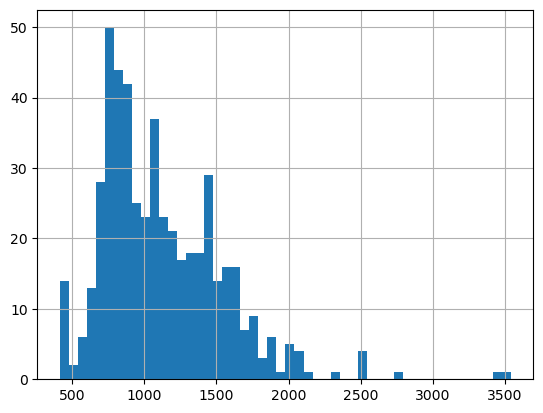

In [7]:
df['text_length'] = df['description'].apply(len)
df['text_length'].hist(bins=50)
plt.show()

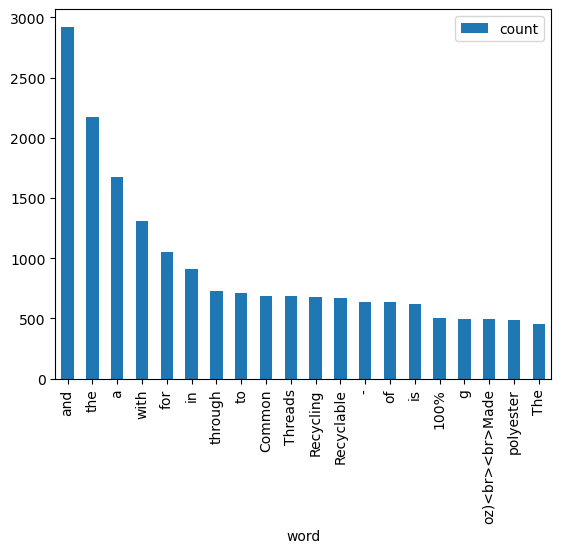

In [8]:
text_data = df['description'].str.cat(sep='-')
word_counts = Counter(text_data.split())
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
common_words_df.plot(kind='bar', x='word', y='count')
plt.show()

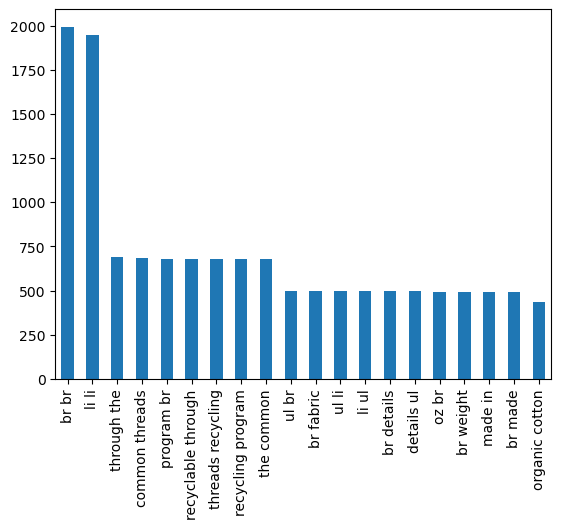

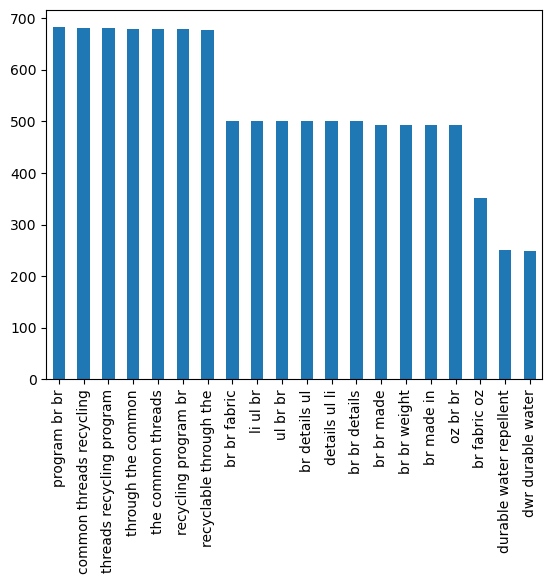

In [9]:
# bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['description'])
bigram_counts = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out())
bigram_counts.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

# trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = vectorizer.fit_transform(df['description'])
trigram_counts = pd.DataFrame(trigrams.toarray(), columns=vectorizer.get_feature_names_out())
trigram_counts.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

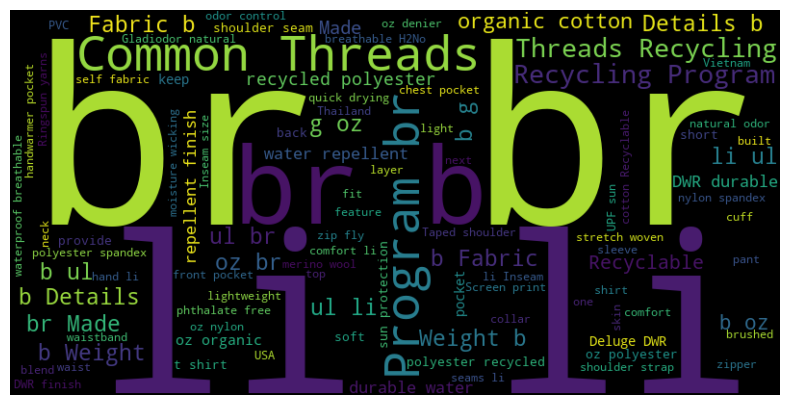

In [10]:
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We will be using Tf-Idf to find similar items based on description
* instantiate TF-IDF

In [11]:
tfidf_vectorizer = TfidfVectorizer()

* fit and transform 'description' column with TFIDF

In [12]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

* calculate the cosine similarity of each item with every other item in the dataset, 

In [13]:
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

* sort all items using their similarity for each item i, and store the values in dictionary `results`

```
results = {
    "1": [5,7,9...],
    "2": [45,2,3...]
}
```

In [14]:
results = {}
for idx, row in enumerate(cosine_sim_matrix):
    similar_indices = row.argsort()[::-1]  # sort indices in descending order of similarity
    similar_items = [(i, row[i]) for i in similar_indices if i != idx]  # exclude the item itself
    results[idx] = similar_items

* create function `recommender` that will recommend similar products
    * function must have two input params: **item_id** and **count** of similar products 

In [15]:
def recommender(item_id, num_similar_items=5):
    if item_id not in results:
        return []
    return results[item_id][:num_similar_items]

* show top 5 the most similar items for item with idem_id = 11

In [16]:
# get the top 5 most similar items for item_id = 11
top_5_similar_items = recommender(11, 5)

In [19]:
# print the results
pprint(f"Top 5 similar items to item 11: {top_5_similar_items}")

('Top 5 similar items to item 11: [(401, 0.4924853123250397), (407, '
 '0.3939974153469454), (427, 0.3882779409861265), (311, 0.38232259643882205), '
 '(465, 0.38108930725792717)]')
